In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [9]:
house = pd.read_csv("../datasets/USA_houseprices_2014/preprocessed_data_USAhouseprices2014.csv")
house.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,year_since_1st_renovation,city,statezip,have_basement,price
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.921053,0.837209,0.815789,False,313000.0
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.813953,0.763158,True,2384000.0
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.418605,0.342105,False,342000.0
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.069767,0.092105,True,420000.0
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.807018,0.720930,0.407895,True,550000.0


In [10]:
house.columns
house_copy = house.copy()

In [11]:
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
#                  hue='bedrooms', palette='tab20',size=6)
# g.set(xticklabels=[]);

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

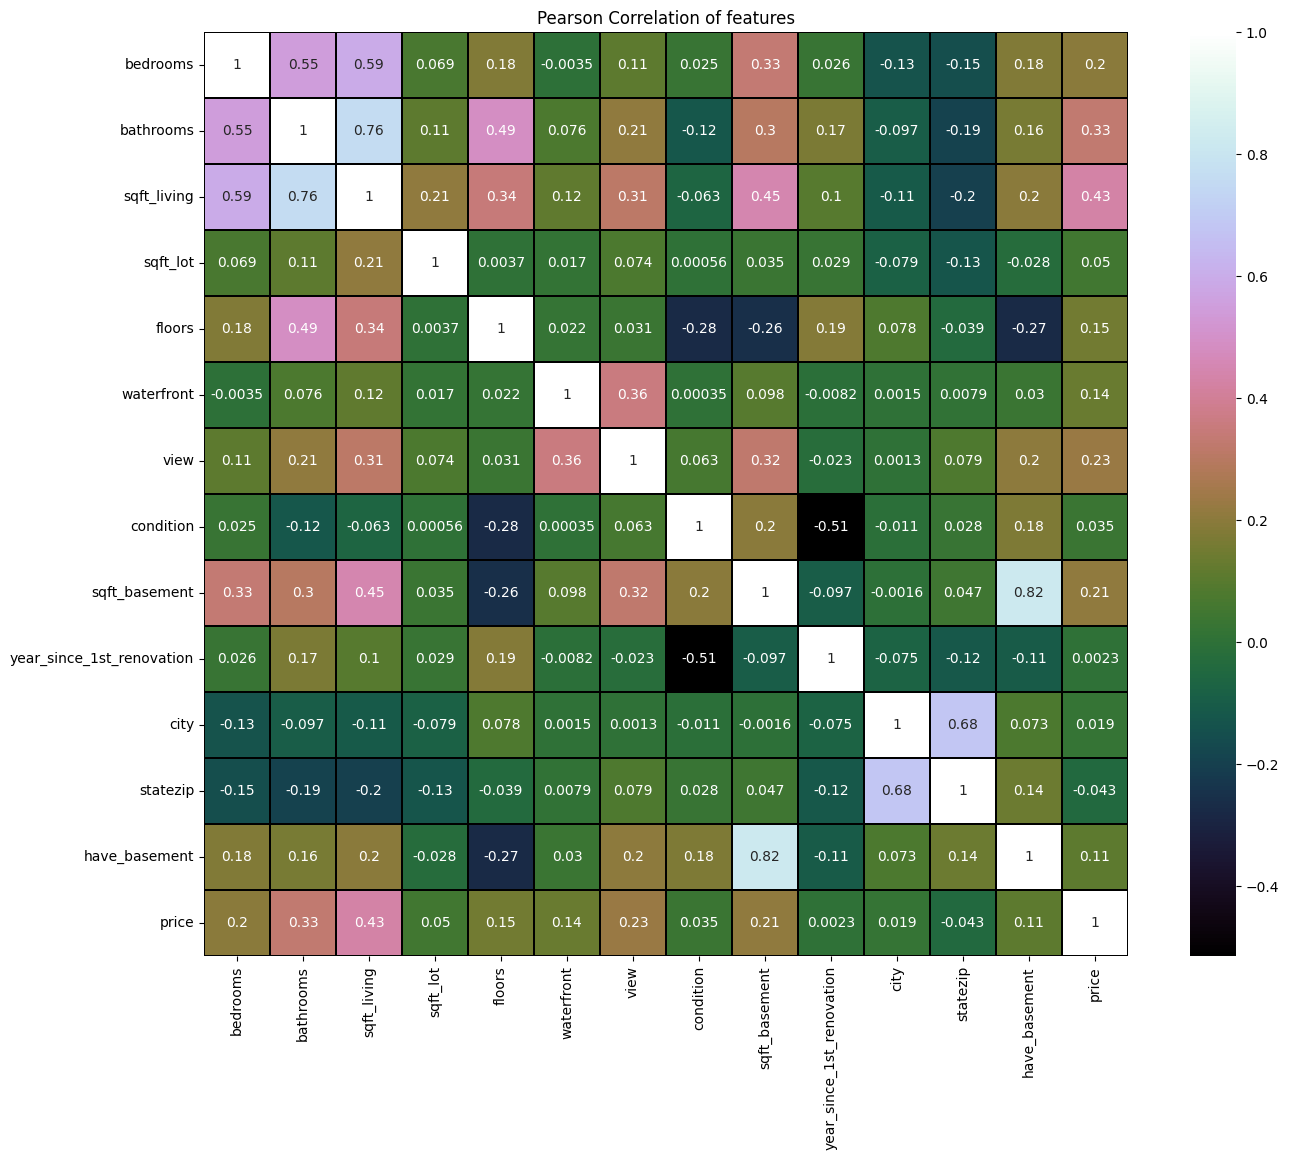

In [12]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = house.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [13]:
# First extract the target variable which is our House prices
Y = house_copy.price.values
# Drop price from the house dataframe and create a matrix out of the house data
house_copy = house_copy.drop(['price'], axis=1)
X = house_copy.values
# Store the column/feature names into a list "colnames"
colnames = house_copy.columns


In [14]:
colnames

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement',
       'year_since_1st_renovation', 'city', 'statezip', 'have_basement'],
      dtype='object')

In [15]:
colnames = house_copy.columns


In [16]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [17]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [18]:

# Construct our Linear Regression model
lr = LinearRegression(

    
)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [19]:
ranks['RFE']

{'bedrooms': 0.75,
 'bathrooms': 0.5,
 'sqft_living': 1.0,
 'sqft_lot': 0.92,
 'floors': 0.0,
 'waterfront': 0.83,
 'view': 0.67,
 'condition': 0.58,
 'sqft_basement': 0.33,
 'year_since_1st_renovation': 0.08,
 'city': 0.42,
 'statezip': 0.25,
 'have_basement': 0.17}

In [20]:
ranks['RF']

{'bedrooms': 0.01,
 'bathrooms': 0.24,
 'sqft_living': 1.0,
 'sqft_lot': 0.33,
 'floors': 0.03,
 'waterfront': 0.0,
 'view': 0.03,
 'condition': 0.18,
 'sqft_basement': 0.07,
 'year_since_1st_renovation': 0.12,
 'city': 0.15,
 'statezip': 0.42,
 'have_basement': 0.0}

In [21]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}

methods = ['RF']
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in methods]), 2)
 
methods = sorted(methods)
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	RF	Mean
bedrooms	0.01	0.01
bathrooms	0.24	0.24
sqft_living	1.0	1.0
sqft_lot	0.33	0.33
floors	0.03	0.03
waterfront	0.0	0.0
view	0.03	0.03
condition	0.18	0.18
sqft_basement	0.07	0.07
year_since_1st_renovation	0.12	0.12
city	0.15	0.15
statezip	0.42	0.42
have_basement	0.0	0.0


In [22]:
for x in ranks.keys():
    print(x)

RF
RFE
Mean


In [23]:
ranklist = []
for item in r.items():
    ranklist.append(item)

In [24]:
ranklist.sort(key=lambda a: a[1])
ranklist


[('waterfront', 0.0),
 ('have_basement', 0.0),
 ('bedrooms', 0.01),
 ('floors', 0.03),
 ('view', 0.03),
 ('sqft_basement', 0.07),
 ('year_since_1st_renovation', 0.12),
 ('city', 0.15),
 ('condition', 0.18),
 ('bathrooms', 0.24),
 ('sqft_lot', 0.33),
 ('statezip', 0.42),
 ('sqft_living', 1.0)]

In [25]:
df_rank= pd.DataFrame(ranklist,columns=['feature_name','feature_score_rf'])
df_rank.columns
df_rank['feature_rank'] = df_rank['feature_score_rf'].rank(method='min', ascending=False)
df_rank['method'] = 'Random_forest'
df_rank['dataset'] = 'USA_houseprices_2014'
df_rank = df_rank[['feature_name', 'method', 'feature_rank', 'dataset']]
df_rank.to_csv('../data/featureranks__USAHouse_randomforest.csv', sep=';',index=False)

In [26]:
df_rank

,feature_name,method,feature_rank,dataset
0,waterfront,Random_forest,12.0,USA_houseprices_2014
1,have_basement,Random_forest,12.0,USA_houseprices_2014
2,bedrooms,Random_forest,11.0,USA_houseprices_2014
3,floors,Random_forest,9.0,USA_houseprices_2014
4,view,Random_forest,9.0,USA_houseprices_2014
5,sqft_basement,Random_forest,8.0,USA_houseprices_2014
6,year_since_1st_renovation,Random_forest,7.0,USA_houseprices_2014
7,city,Random_forest,6.0,USA_houseprices_2014
8,condition,Random_forest,5.0,USA_houseprices_2014
9,bathrooms,Random_forest,4.0,USA_houseprices_2014


In [27]:
ranklist

[('waterfront', 0.0),
 ('have_basement', 0.0),
 ('bedrooms', 0.01),
 ('floors', 0.03),
 ('view', 0.03),
 ('sqft_basement', 0.07),
 ('year_since_1st_renovation', 0.12),
 ('city', 0.15),
 ('condition', 0.18),
 ('bathrooms', 0.24),
 ('sqft_lot', 0.33),
 ('statezip', 0.42),
 ('sqft_living', 1.0)]

In [28]:
import scipy.stats as ss

In [29]:
#Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

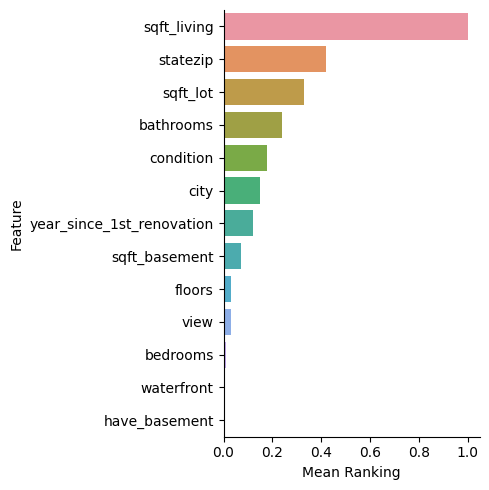

In [30]:
sns.catplot(x="Mean Ranking", y="Feature", kind="bar", data=meanplot)


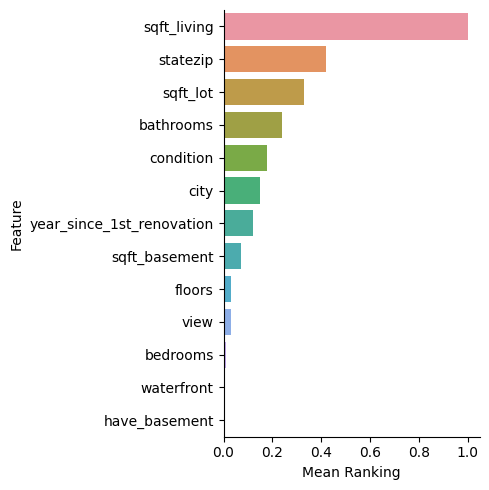

In [31]:
sns.catplot(x="Mean Ranking", y="Feature", kind="bar", data=meanplot)
